In [1]:
%reload_ext autoreload
%autoreload 2

import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np

from nzdownscale.dataprocess.stations import ProcessStations
from nzdownscale.dataprocess.utils import PlotData
from nzdownscale.dataprocess.config import VAR_STATIONS

### Plot Stations

Ideally I would have this for a given date, and the stations would be coloured by the station values. 

In [ ]:
var = 'temperature'
process_stations = ProcessStations()
all_stations = process_stations.get_path_all_stations(var)
print(len(all_stations))

: 

In [ ]:
f = all_stations[0]
ds = process_stations.load_station(f)
da = process_stations.ds_to_da(ds, var)

# takes a couple of minutes
df = process_stations.get_metadata_df(var)

: 

In [ ]:
ax = process_stations.plot_stations_on_map(df)
plt.title(f'Stations: {var}')
#plt.savefig('./tmp/fig.png')
plt.show()

: 

### ERA5 

Plot ERA5-land data.

In [ ]:
from nzdownscale.dataprocess.era5 import ProcessERA5

: 

In [ ]:
era5 = ProcessERA5()
era5_ds = era5.load_ds(var, [2016])
era5_da = era5.ds_to_da(era5_ds, var)

: 

In [ ]:
cbar_kwargs = {"location": 'right', 
                'pad': 0.06,
                'shrink': 0.7,
                'extend': 'both'
                }

: 

In [ ]:
era5_plotnz = PlotData()
era5_fig = plt.figure(figsize=(10, 10))
era5_ax = era5_plotnz.nz_map_with_coastlines()
era5_da_to_plot = era5_da.sel(time='2016-07-01T00:00:00')
min_value, max_value = era5_da_to_plot.min().values, era5_da_to_plot.max().values
era5_p = era5_da_to_plot.plot(cbar_kwargs=cbar_kwargs, 
                              ax = era5_ax,
                              cmap='RdYlBu_r',
                              vmin=min_value, 
                              vmax=max_value)

date = str(era5_da_to_plot["time"].values)[:10]
plt.title(f'ERA5-land: {var.capitalize()}, {date}, 0.1\N{DEGREE SIGN} resolution', 
          fontsize=14)

# label_size = 14
# plt.gca().tick_params(axis='x', labelsize=label_size) 
# plt.gca().tick_params(axis='y', labelsize=label_size)
# plt.savefig('./tmp/fig.png')
plt.show()

: 

### Topography

In [ ]:
from nzdownscale.dataprocess.topography import ProcessTopography

: 

In [ ]:
file = '../data/topography/nz_elevation_200m.nc'  # this was created by running as main data_process/topography.py
top = ProcessTopography()
top_da = top.open_da(file)

: 

In [ ]:
top_nzplot = PlotData()
# da.plot()  # ~2 min
top_nzplot.nz_map_with_coastlines()
top_da.plot(cbar_kwargs=cbar_kwargs, cmap='terrain', vmin = 0)
plt.title('Topography, 1km resolution', fontsize=14)
# plt.savefig('./tmp/fig.png')
plt.show()

: 

### Stations

In [ ]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

: 

In [ ]:
var = 'temperature'
process_stations = ProcessStations()
all_stations = process_stations.get_path_all_stations(var)

: 

In [ ]:
date = '2016-07-01'
df_date = None
for f in tqdm(all_stations):
    df = process_stations.load_station_df(f, var, daily=True)
    try:
        station_at_date = df[df.index == date]
        if type(df_date) == pd.DataFrame:
            df_date = pd.concat([df_date, station_at_date])
        else:
            print('Creating df_date')
            df_date = station_at_date
    except:
        pass


: 

In [ ]:
stations_date_plotnz = PlotData()
era5_fig = plt.figure(figsize=(10, 10))
stations_date_ax = stations_date_plotnz.nz_map_with_coastlines()
# vmin, vmax = df_date['dry_bulb'].min(), df_date['dry_bulb'].max()

norm = Normalize(vmin=min_value, vmax=max_value)
cmap = plt.get_cmap('RdYlBu_r')
sm = ScalarMappable(norm=norm, cmap=cmap)

for row in df_date.iterrows():
    lon = row[1]['longitude']
    lat = row[1]['latitude']
    color = sm.to_rgba(row[1]['dry_bulb'])

    stations_date_ax.scatter(lon, lat, color=color, 
                            marker='o', s=40,
                            cmap=cmap,
                            vmin=min_value,
                            vmax=max_value);
    
cbar = era5_fig.colorbar(sm, ax=stations_date_ax, **cbar_kwargs)
cbar.set_label('Dry Bulb Temperature')

plt.title(f'Station data: {var.capitalize()}, {date}', 
          fontsize=14);

# # label_size = 14
# # plt.gca().tick_params(axis='x', labelsize=label_size) 
# # plt.gca().tick_params(axis='y', labelsize=label_size)
# # plt.savefig('./tmp/fig.png')
# plt.show()

: 

Plot of internal densities

Text(0, 0.5, 'Test loss')

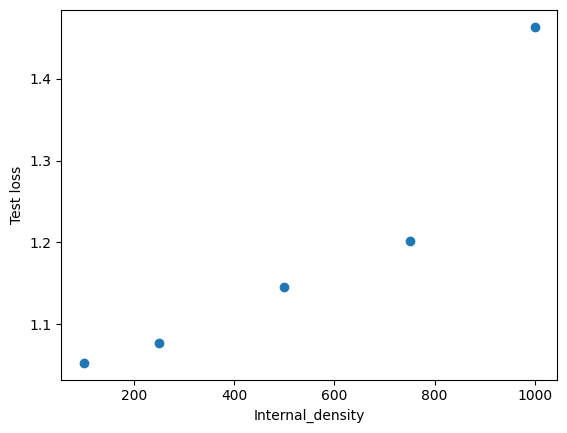

In [7]:
density_loss = {
    100: 1.052734,
    250: 1.076918, 
    500: 1.144992, 
    750: 1.20147,
    1000: 1.463745
}

plt.scatter(density_loss.keys(), density_loss.values())
plt.xlabel('Internal_density')
plt.ylabel('Test loss')